<div align="">

# **Talento Tech – Procesamiento de Imágenes con scikit-image**  

**By:** Ing. Engler González  
**Programa:** Bootcamp IA / Datos – Región 3  
**Institución:** UT UTP – FACEIT (Talento Tech)  

</div>

---

> **Cómo usar este cuaderno**  
> 1) Ejecuta las celdas en orden.  
> 2) Lee las notas, luego corre el código.  
> 3) En “Tus propias imágenes” podrás subir archivos y experimentar.

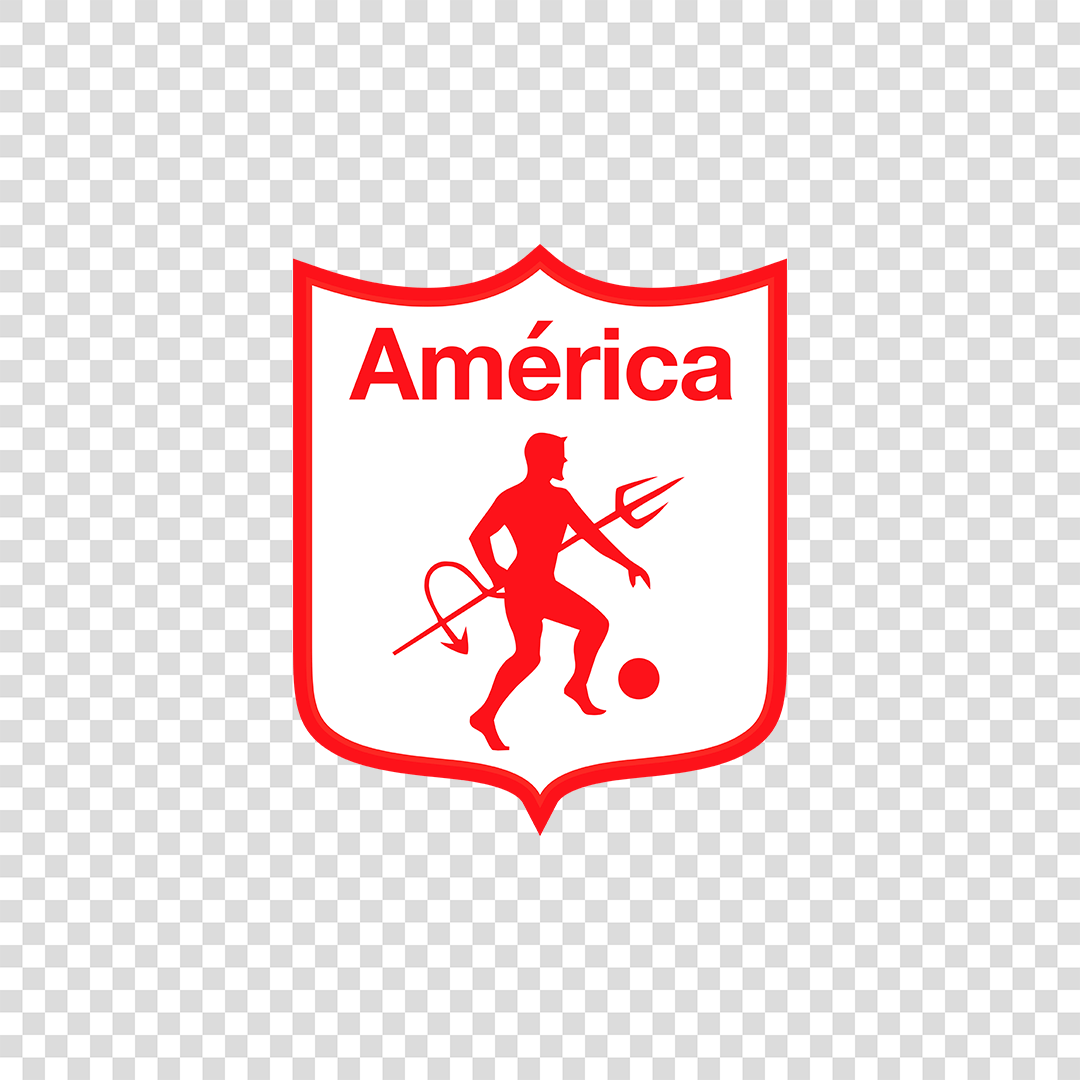

In [1]:
# Muestra un logo si existiera en la ruta indicada (opcional)
# Ejemplos: "logo_talento.png"  |  "/content/mi_logo.png"
LOGO_PATH = "/content/logo_america.png"  # <- pon aquí la ruta si tienes un logo
if LOGO_PATH:
    try:
        from IPython.display import Image, display
        display(Image(filename=LOGO_PATH))
    except Exception as e:
        print("No se pudo mostrar el logo:", e)
else:
    print("Sin logo (opcional). Define LOGO_PATH si deseas mostrar uno).")

## Objetivos
- Cargar y visualizar imágenes en Python.  
- Convertir a escala de grises.  
- Aplicar filtros (suavizado y bordes).  
- Mejorar el contraste.  
- **Segmentar** y **contar** objetos.  
- Usar morfología (erosión, dilatación, apertura/cierre).

## 1) Instalación (si hace falta)

In [2]:
# En Colab, descomenta si es necesario:
!pip install -q scikit-image matplotlib

## 2) Importaciones y helper para mostrar

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color, filters, exposure, morphology, measure, feature
from skimage.filters import threshold_otsu
from skimage.transform import rotate, rescale

def show(*imgs, titles=None, cmap=None, figsize=(14,4)):
    n = len(imgs)
    plt.figure(figsize=figsize)
    for i, img in enumerate(imgs, 1):
        plt.subplot(1, n, i)
        if cmap is not None and (img.ndim == 2 or getattr(img, 'shape', (0,))[-1] == 1):
            plt.imshow(img, cmap=cmap)
        else:
            try:
                plt.imshow(img, cmap=cmap)
            except:
                plt.imshow(img, cmap='gray')
        if titles and i-1 < len(titles):
            plt.title(titles[i-1])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

## 3) Cargar y visualizar (Astronauta)

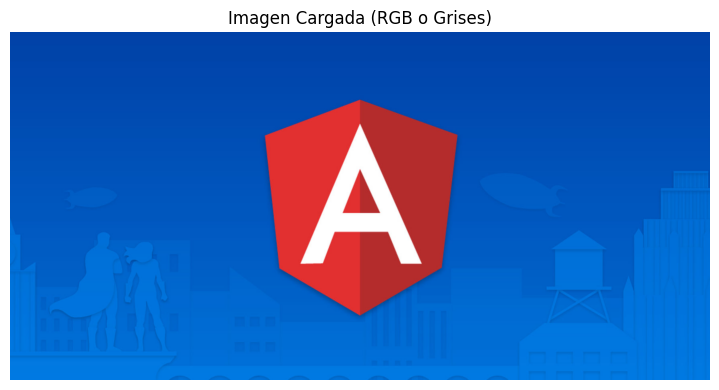

Forma: (868, 1746, 3) | dtype: uint8


In [22]:
# TODO: Carga la imagen astronauta, muéstrala y comenta su forma (alto, ancho, canales).
# img_color = data.astronaut() # RGB
from skimage import io
PATH_IMG = 'Angular.jpg'
img_color = io.imread(PATH_IMG) # Carga la imagen Angular.jpg

show(img_color, titles=["Imagen Cargada (RGB o Grises)"])
# show(img_color, titles=["Astronauta (RGB)"])
print("Forma:", img_color.shape, "| dtype:", img_color.dtype)

## 4) Escala de grises

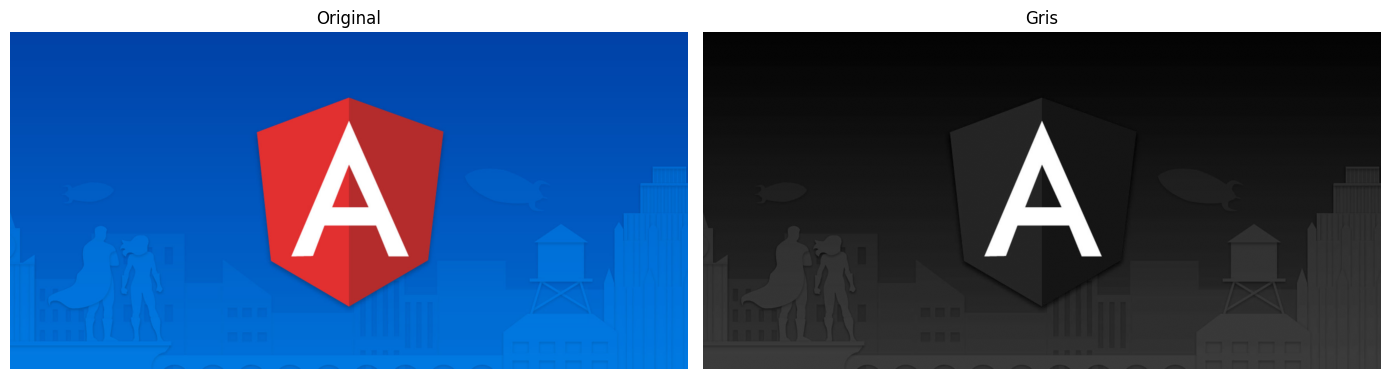

In [23]:
# TODO: Convierte a escala de grises y compárala con la original.
# Verifica si la imagen tiene 4 canales (RGBA) y elimina el canal alfa si es necesario
if img_color.shape[-1] == 4:
    img_color_rgb = img_color[..., :3]
else:
    img_color_rgb = img_color

img_gray = color.rgb2gray(img_color_rgb)
show(img_color, img_gray, titles=["Original", "Gris"], cmap='gray')

## 5) Filtros: suavizado + bordes

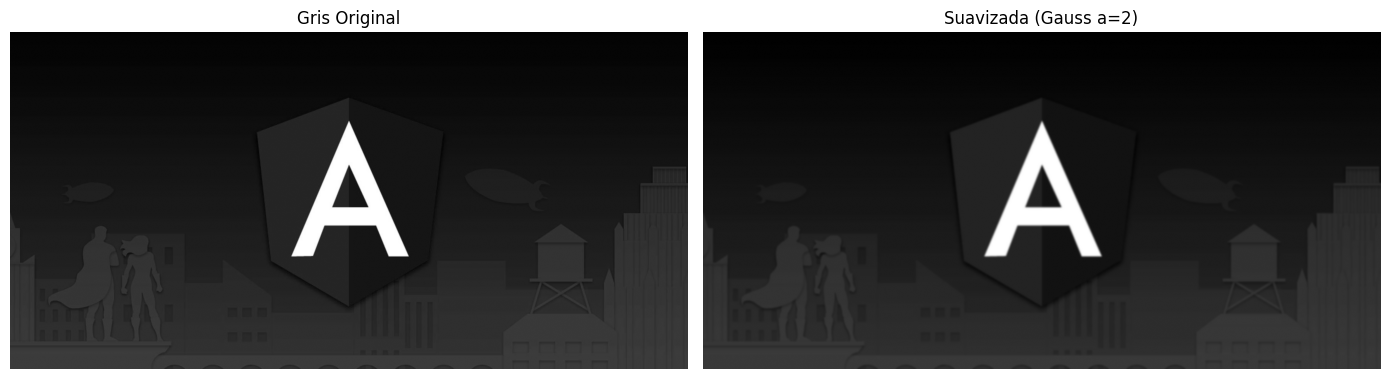

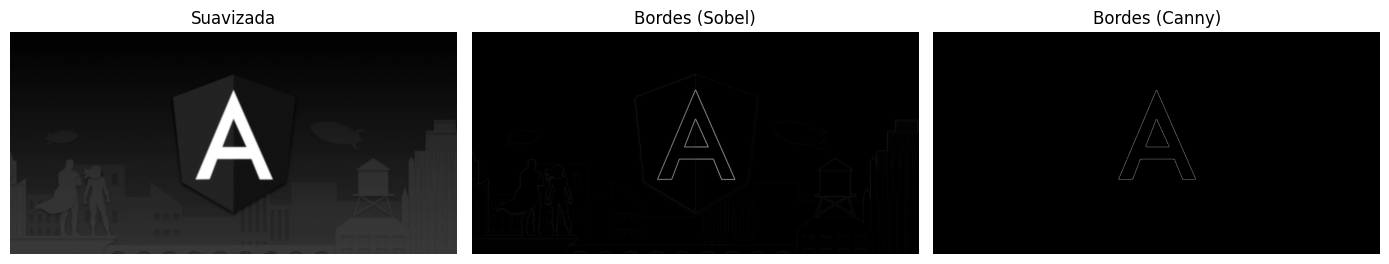

In [24]:
# TODO: Aplica Gauss (sigma=2) y bordes (Sobel y Canny). ¿Qué diferencias notas?
suave = filters.gaussian(img_gray, sigma=2)
sobel = filters.sobel(img_gray)
canny = feature.canny(img_gray, sigma=2)
show(img_gray, suave, titles=["Gris Original", "Suavizada (Gauss a=2)"], cmap='gray')
show(suave, sobel, canny, titles=["Suavizada", "Bordes (Sobel)", "Bordes (Canny)"], cmap='gray')

## 6) Mejora de contraste

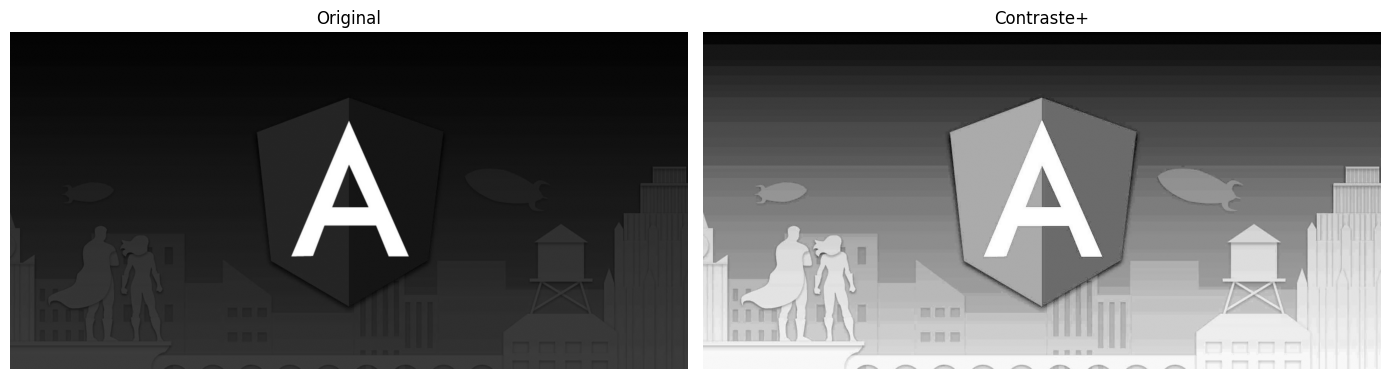

In [25]:
# TODO: Aplica equalize_hist y compara.
eq = exposure.equalize_hist(img_gray)
show(img_gray, eq, titles=["Original", "Contraste+"], cmap='gray')

## 7) Segmentación (Otsu) + Morfología + Conteo

Objetos detectados: 25
Objetos válidos (filtrados): 20


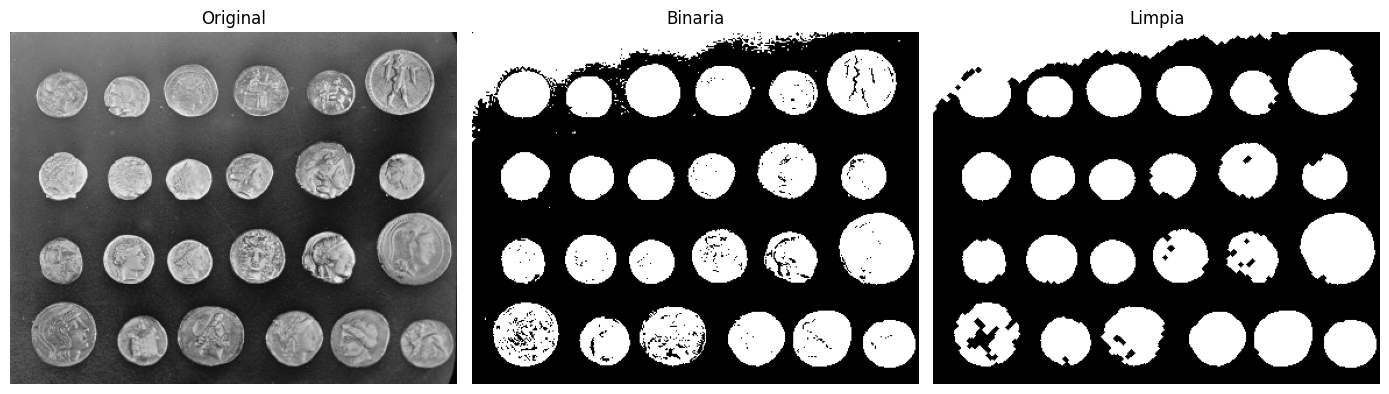

In [26]:
# TODO: Segmenta monedas, limpia con morfología y cuenta objetos.
coins = data.coins()
th = threshold_otsu(coins)
binary = coins > th

from skimage.morphology import opening, closing, disk
clean = opening(binary, disk(2))
clean = closing(clean, disk(2))

labels = measure.label(clean)
props = measure.regionprops(labels)

areas = [p.area for p in props]
umbral_area = np.percentile(areas, 20) if len(areas) > 0 else 0
valid = [p for p in props if p.area >= umbral_area]

print("Objetos detectados:", len(props))
print("Objetos válidos (filtrados):", len(valid))

show(coins, binary, clean, titles=["Original", "Binaria", "Limpia"], cmap='gray')

## 8) Transformaciones geométricas (extra)

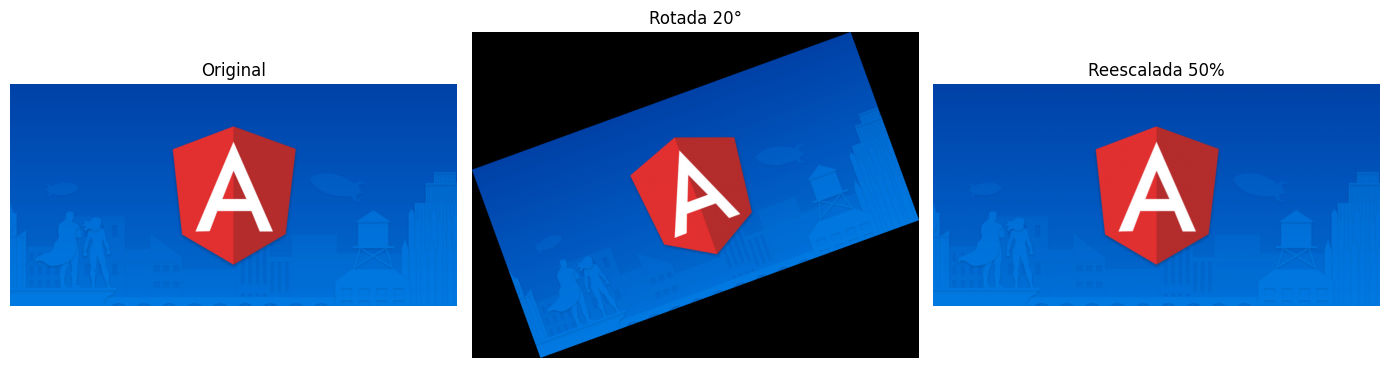

In [27]:
# TODO: Rota 20° y reescala a 50%.
rot = rotate(img_color, 20, resize=True)
try:
    small = rescale(img_color, 0.5, channel_axis=-1, anti_aliasing=True)
except TypeError:
    small = rescale(img_color, 0.5, multichannel=True, anti_aliasing=True)

show(img_color, rot, small, titles=["Original", "Rotada 20°", "Reescalada 50%"])

## 9) Retos finales 🎯
1) **Filtro Instagram casero:** Gris → Equalize → Canny → Combina (p.ej., `0.8*eq + 0.2*canny`).  
2) **Detector de objetos:** Con otra imagen de `data` (p.ej., `camera()`), aplica Otsu + morfología y cuenta objetos.  
3) **Mejora de foto oscura:** Usa equalize y comenta qué detalles aparecen.

## 📥 Tus propias imágenes
Puedes **subir imágenes** desde tu computador (Colab)
Prueba con fotos de tu celular (paisajes, documentos, objetos), para aplicar filtros y segmentación.

Detectado Colab. Sube una o varias imágenes...


Saving Angular.jpg to Angular (1).jpg
Archivos subidos: ['Angular (1).jpg']
Usando el archivo subido: Angular (1).jpg


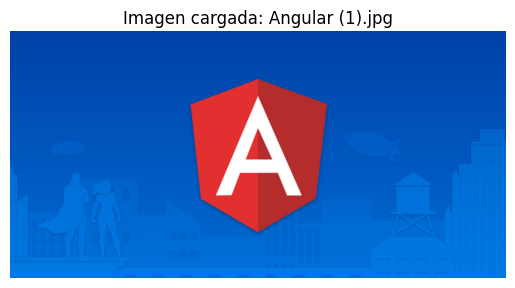

In [20]:
# Opción A) Subir archivos en Google Colab
# - Ejecuta y aparecerá un selector de archivos.
# - Se cargan en el directorio de trabajo.
try:
    from google.colab import files  # type: ignore
    print("Detectado Colab. Sube una o varias imágenes...")
    up = files.upload()
    print("Archivos subidos:", list(up.keys()))
except Exception as e:
    print("No estás en Colab o módulo no disponible:", e)

# Opción B) Leer una imagen por ruta (Jupyter/Colab)
# Ejemplo: PATH_IMG = 'mi_foto.jpg'
# Usar el primer archivo subido si existe
if 'up' in locals() and len(up) > 0:
  PATH_IMG = list(up.keys())[0]
  print(f"Usando el archivo subido: {PATH_IMG}")
else:
  PATH_IMG = "/content" # Ruta por defecto si no se suben archivos

if PATH_IMG and PATH_IMG != "/content": # Evitar intentar leer el directorio /content
    from skimage import io
    try:
        img_user = io.imread(PATH_IMG)
        import matplotlib.pyplot as plt
        plt.imshow(img_user if img_user.ndim==3 else img_user, cmap='gray' if img_user.ndim==2 else None)
        plt.title(f"Imagen cargada: {PATH_IMG}")
        plt.axis('off')
        plt.show()
    except Exception as e:
        print("No se pudo leer la imagen:", e)
else:
    print("Define PATH_IMG con la ruta a una imagen para visualizarla.")

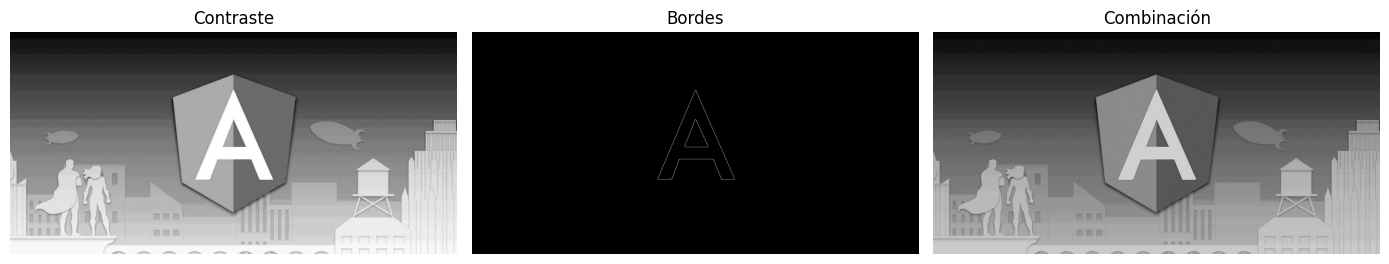

In [28]:
# ESPACIO DE TRABAJO (puedes duplicar y experimentar)
# A) Filtro combinado
combo = 0.8*eq + 0.2*canny.astype(float)
show(eq, canny, combo, titles=["Contraste", "Bordes", "Combinación"], cmap='gray')

## ✅ Cierre
- Imagen = matriz.  
- Pipeline: preprocesar → segmentar → morfología → medir/contar.  
- Úsalo en mini‑proyectos (salud, agricultura, seguridad, mapas, etc.).